In [57]:
import matplotlib.pyplot as plt

import scipy as sp
import scipy.io
import numpy as np
import os
os.sys.path.append('../../behavior')
os.sys.path.append('../../')
from behavior_analysis import loadmat_sbx

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas 

from utilities import load_ca_mat, trial_tensor, across_trial_avg
import utilities
import behavior_two_towers as b
from scipy.ndimage.filters import gaussian_filter1d

%load_ext autoreload
%autoreload 2





%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
dataDict = {}

# DG imaging
dataDict['4054010.5'] = {}
dataDict['4054010.5']['noTimeout'] = [['3_imaging','TT_train3/TT_train3_000_001']]
dataDict['4054010.5']['Timeout'] = [['1_imaging','TT_to1/TT_to1_000_005'],['2_imaging','TT_to2/TT_to2_000_002']]


# CA1 imaging
dataDict['4054011.1']={}
dataDict['4054011.1']['noTimeout']=[['4_imaging','TT_train_morph/TT_train_morph_000_005']]
dataDict['4054011.1']['Timeout'] = [['2_imaging','TT_to2/TT_to2_000_002']]


dataDict['4139190.1']={}
dataDict['4139190.1']['noTimeout']=[['1_imaging','TT_train1/TT_train1_000_005'],['1_imaging2','TT_train1/TT_train1_000_008'],
                                    ['2_imaging','TT_train2/TT_train2_000_002']]
dataDict['4139190.1']['Timeout']=[['5_1_imaging','TT_to5/TT_to5_000_001']]


dataDict['4139190.3']={}
dataDict['4139190.3']['noTimeout']=[['1_imaging2','TT_train1/TT_train1_000_006'],['1_imaging3','TT_train1/TT_train1_001_001'],['3_imaging','TT_train3/TT_train3_000_002']]                                      
dataDict['4139190.3']['Timeout']=[['2_imaging','TT_to2/TT_to2_000_002']]




In [84]:
C_dat,Behavior = {},{}
for mouse in dataDict.keys():
    C_dat[mouse]={}
    
    for sess, scan in dataDict[mouse]['noTimeout']:
        sess = '1PortTower_noTimeout_'+sess +'_'
        info = loadmat_sbx("E:/" + mouse+ "/" + scan + ".mat")['info']
        ca_dat = load_ca_mat("E:/" + mouse+ "/" + scan + "_cnmf_results_pre.mat")
        
        
        c = b.process_data(mouse,sess)

        gridData, (rewardedTrials, errorTrials, omissionTrials,morphList) = c.align_to_ca(info)
        
        C_dat[mouse][scan]={}
        C_dat[mouse][scan]['behavior']=gridData
        
        C_dat[mouse][scan]['C_dec'] = ca_dat['C_dec'][gridData['ca_inds'],:]
        C_dat[mouse][scan]['C_dec'] = ca_dat['C_dec'][gridData['ca_inds'],:]
        C_dat[mouse][scan]['S_dec'] = ca_dat['S_dec'][gridData['ca_inds'],:]
        
    for sess, scan in dataDict[mouse]['Timeout']:
        sess = '1PortTower_Timeout_'+sess +'_'
        info = loadmat_sbx("E:/" + mouse+ "/" + scan + ".mat")['info']
        ca_dat = load_ca_mat("E:/" + mouse+ "/" + scan + "_cnmf_results_pre.mat")
        
        
        c = b.process_data(mouse,sess)

        gridData, (rewardedTrials, errorTrials, omissionTrials,morphList) = c.align_to_ca(info)
        
        C_dat[mouse][scan]={}
        C_dat[mouse][scan]['behavior']=gridData
        
        C_dat[mouse][scan]['C_dec'] = ca_dat['C_dec'][gridData['ca_inds'],:]
        C_dat[mouse][scan]['C_dec'] = ca_dat['C_dec'][gridData['ca_inds'],:]
        C_dat[mouse][scan]['S_dec'] = ca_dat['S_dec'][gridData['ca_inds'],:]
        



E:/4054010.5/TT_train3/TT_train3_000_001.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4054010.5\1PortTower_noTimeout_3_imaging__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4054010.5/TT_to1/TT_to1_000_005.mat
#subsystem#not made into numpy array
E:/4054010.5/TT_to2/TT_to2_000_002.mat
#subsystem#not made into numpy array
E:/4054011.1/TT_train_morph/TT_train_morph_000_005.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4054011.1\1PortTower_noTimeout_4_imaging__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4054011.1/TT_to2/TT_to2_000_002.mat
#subsystem#not made into numpy array
E:/4139190.1/TT_train1/TT_train1_000_005.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.1\1PortTower_noTimeout_1_imaging__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.1/TT_train1/TT_train1_000_008.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.1\1PortTower_noTimeout_1_imaging2__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.1/TT_train2/TT_train2_000_002.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.1\1PortTower_noTimeout_2_imaging__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.1/TT_to5/TT_to5_000_001.mat
#subsystem#not made into numpy array
E:/4139190.3/TT_train1/TT_train1_000_006.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.3\1PortTower_noTimeout_1_imaging2__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.3/TT_train1/TT_train1_001_001.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.3\1PortTower_noTimeout_1_imaging3__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.3/TT_train3/TT_train3_000_002.mat
#subsystem#not made into numpy array


../../behavior\behavior_two_towers.py:186: UserWarning: genfromtxt: Empty input file: "Z:\VR\2AFC_V3\4139190.3\1PortTower_noTimeout_3_imaging__Timeout.txt"
  toDat = np.genfromtxt(self.basestr + sess + "_Timeout.txt",dtype='float',delimiter='\t')


E:/4139190.3/TT_to2/TT_to2_000_002.mat
#subsystem#not made into numpy array


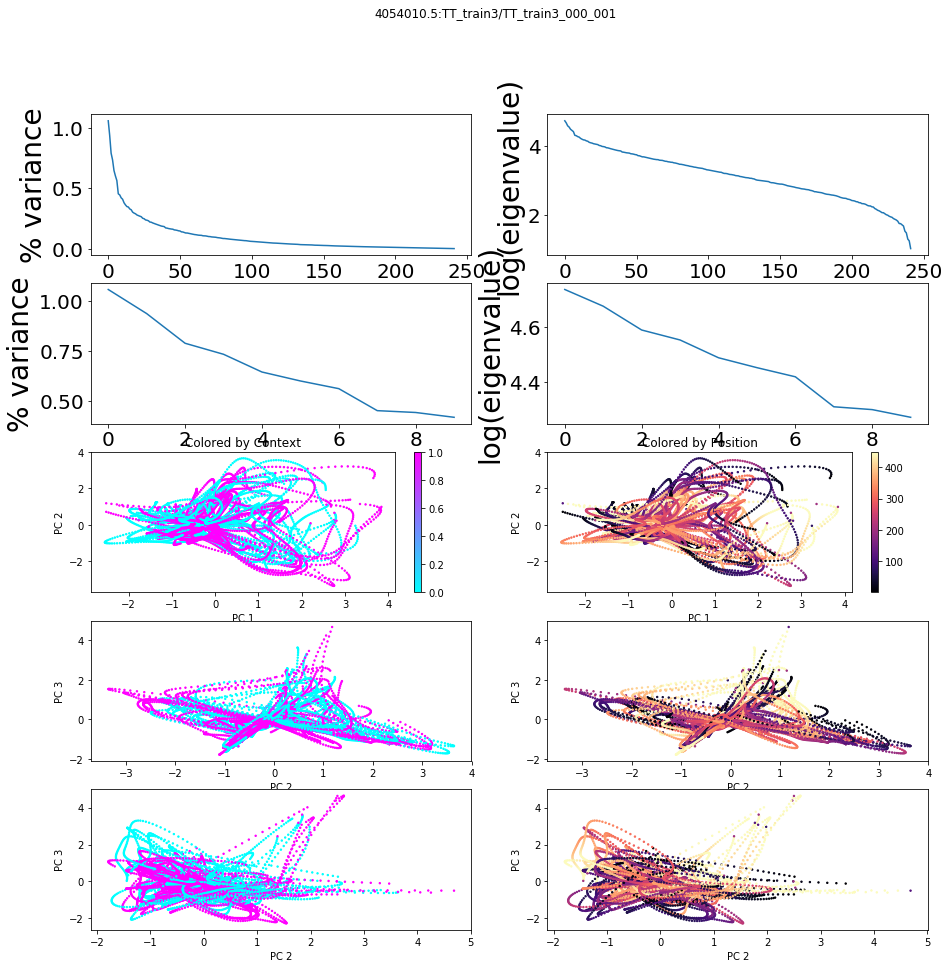

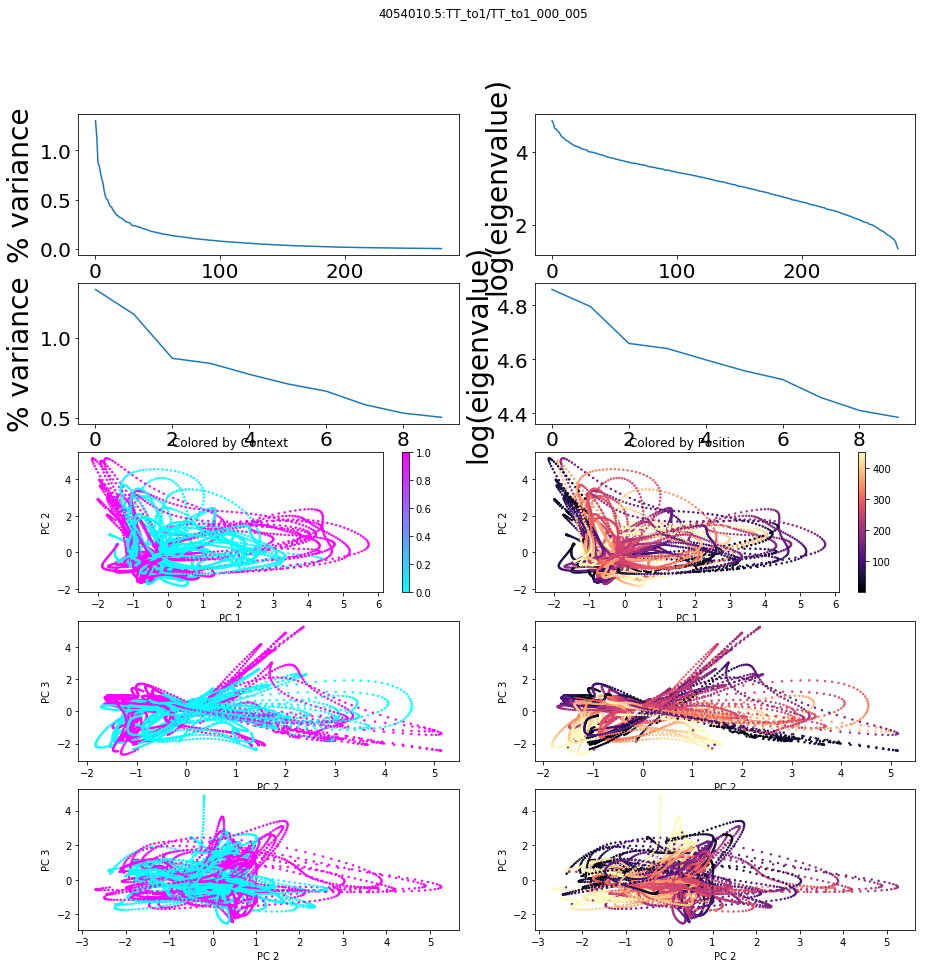

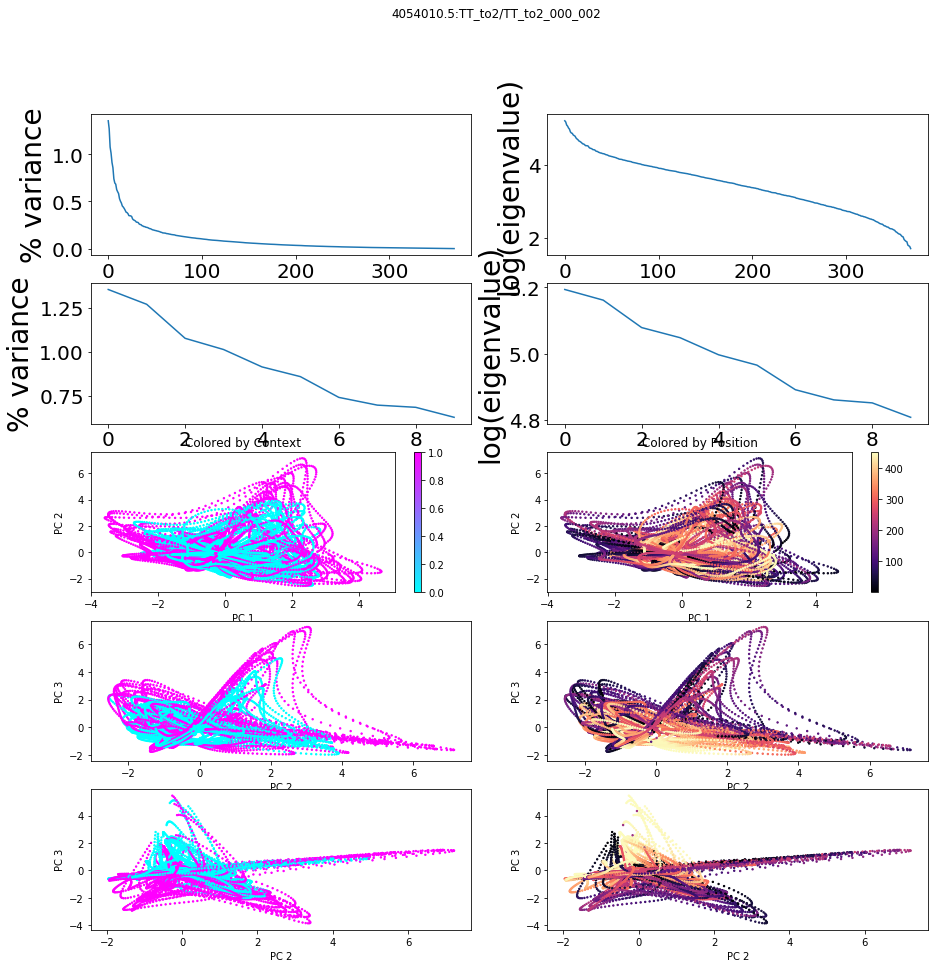

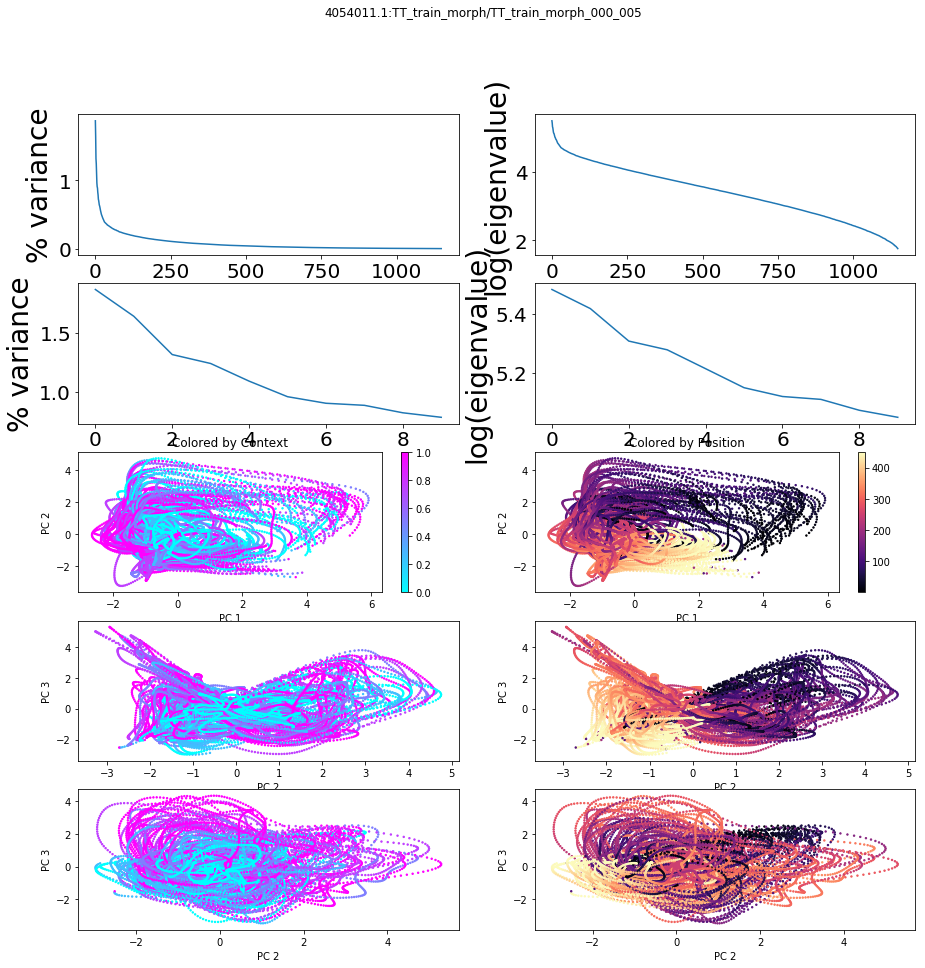

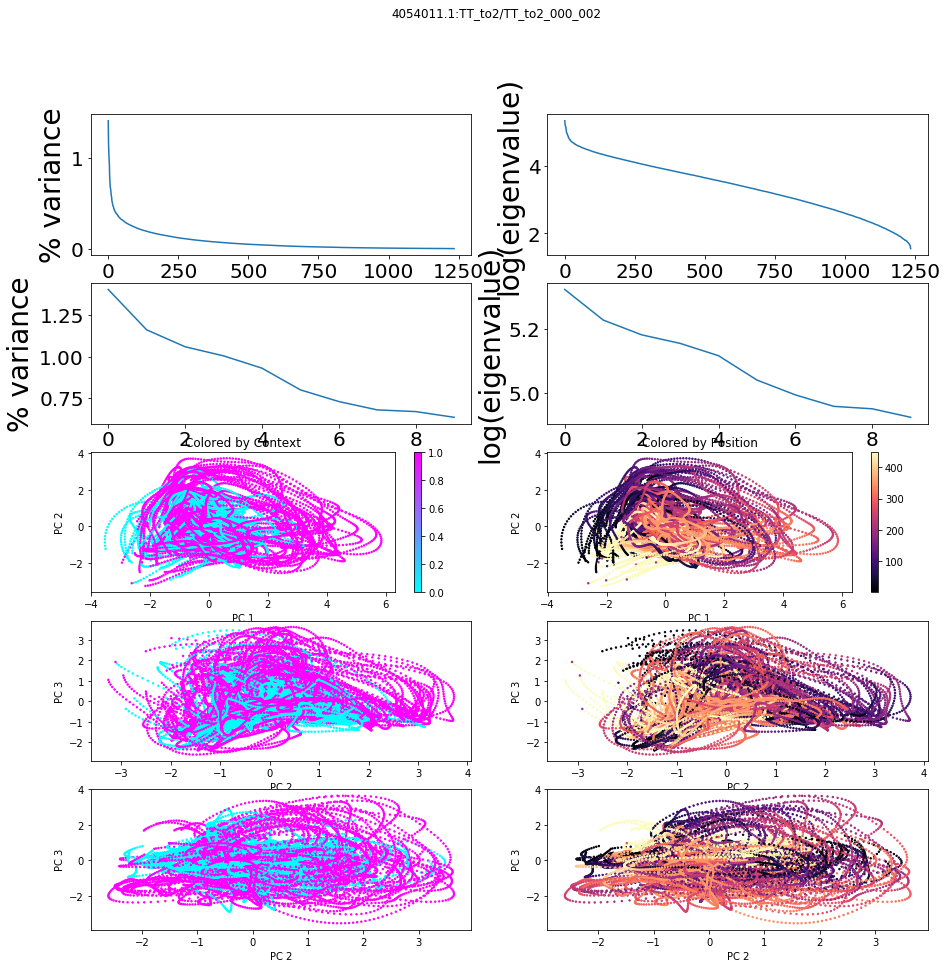

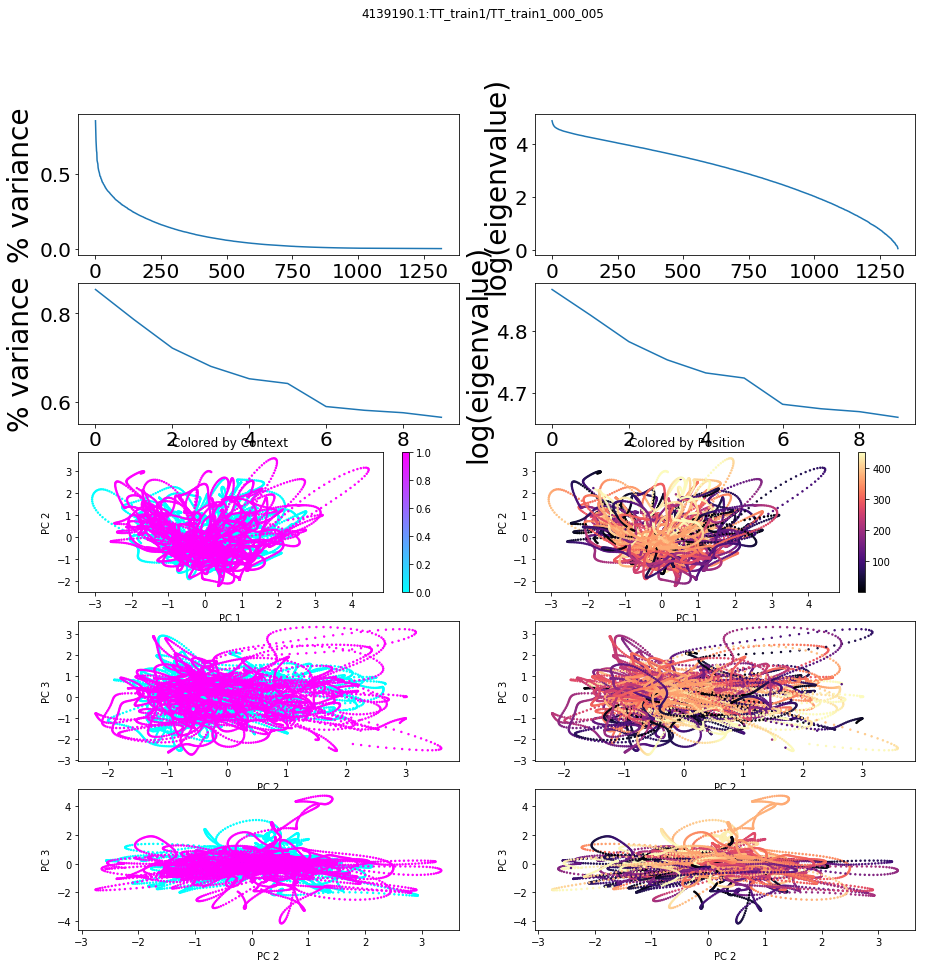

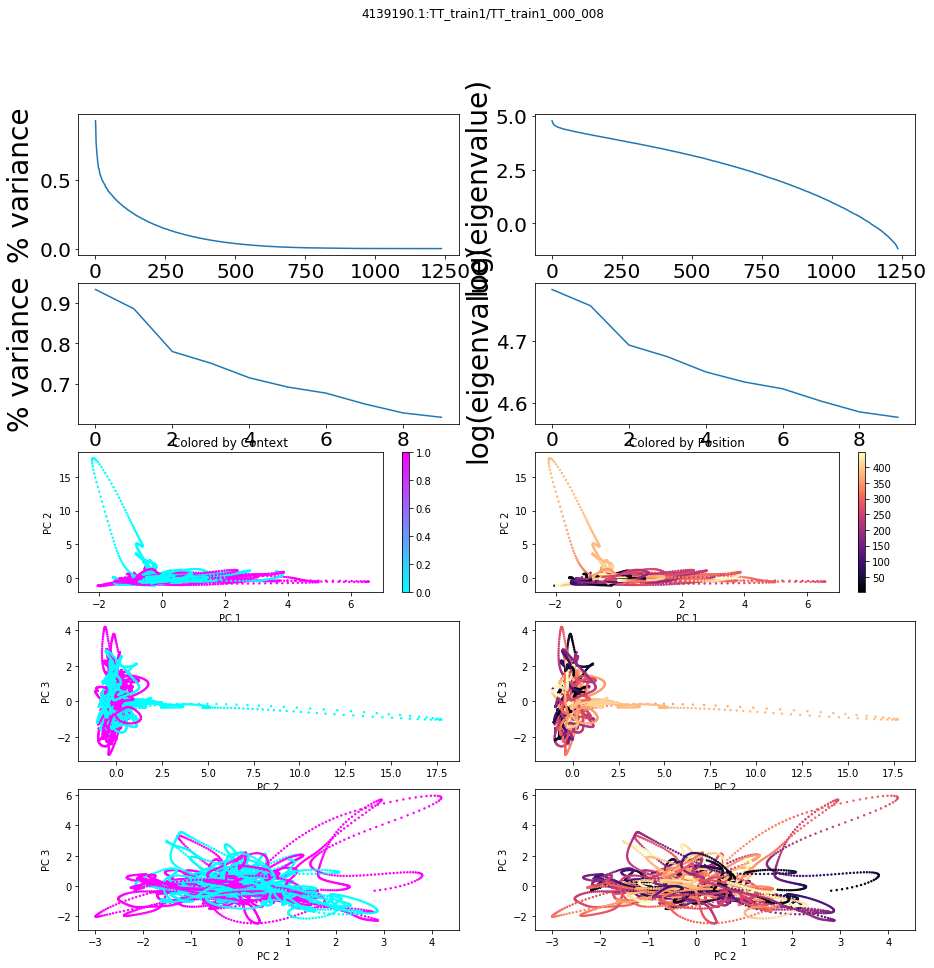

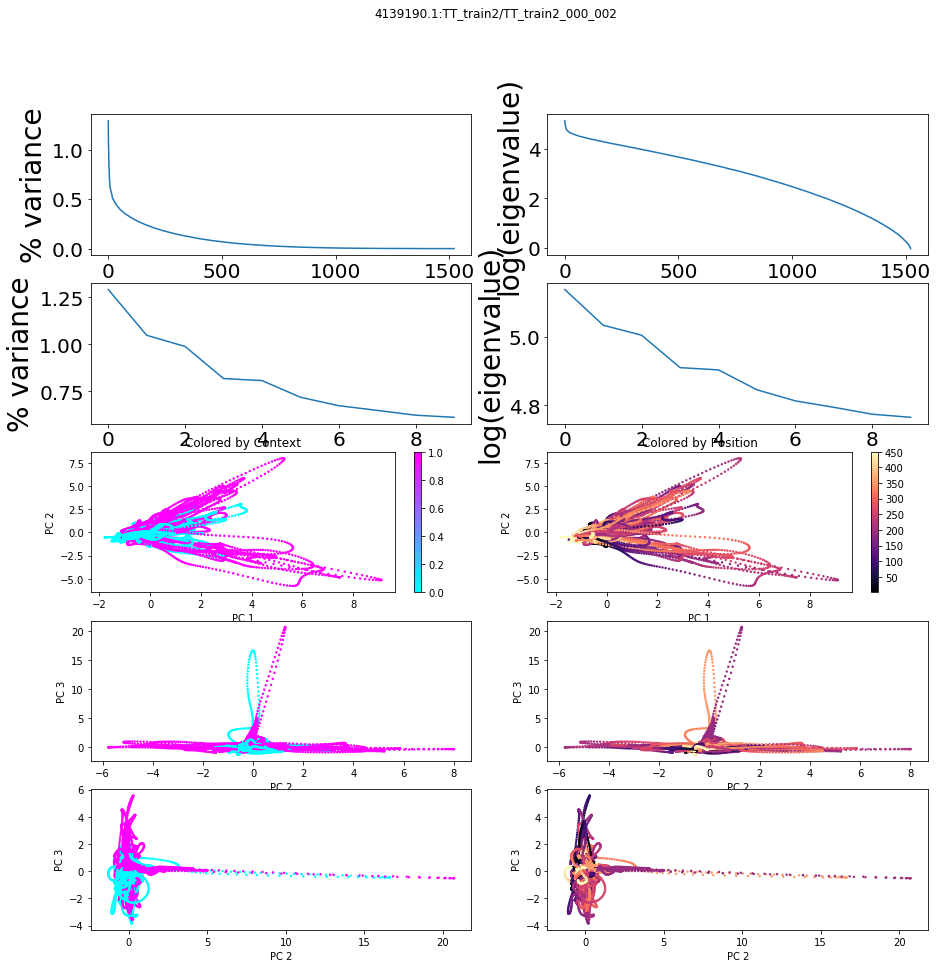

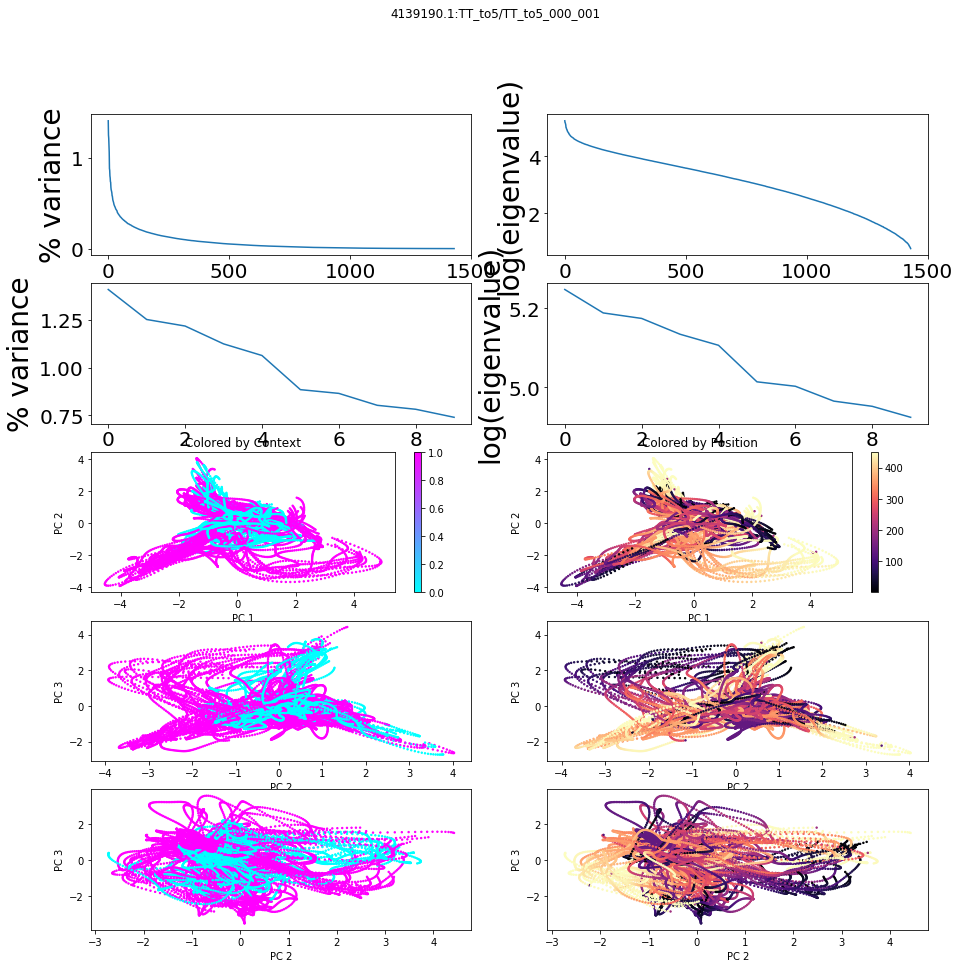

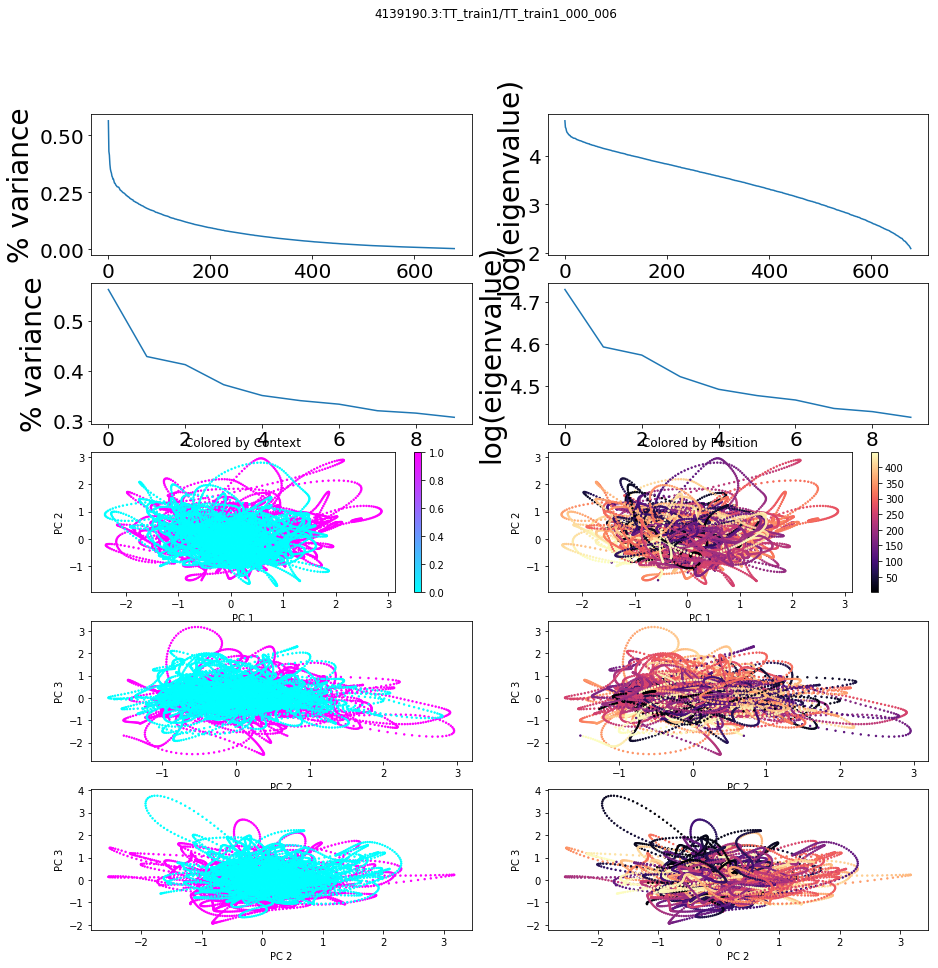

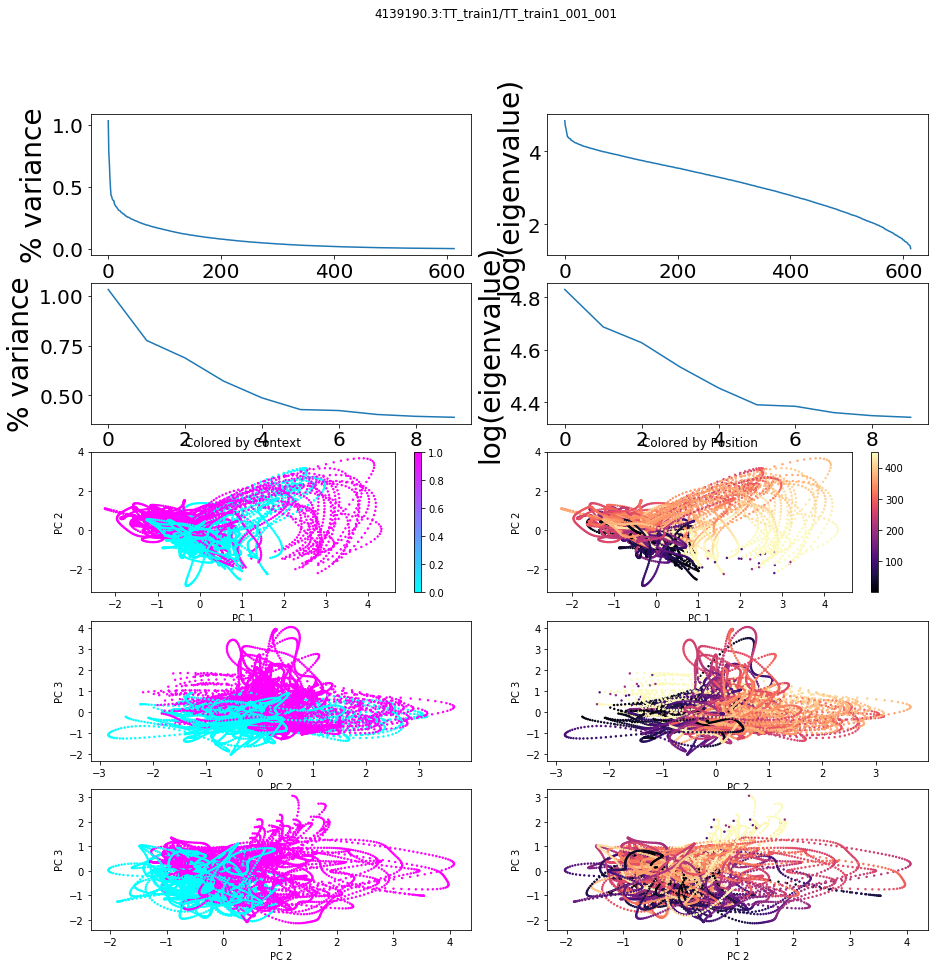

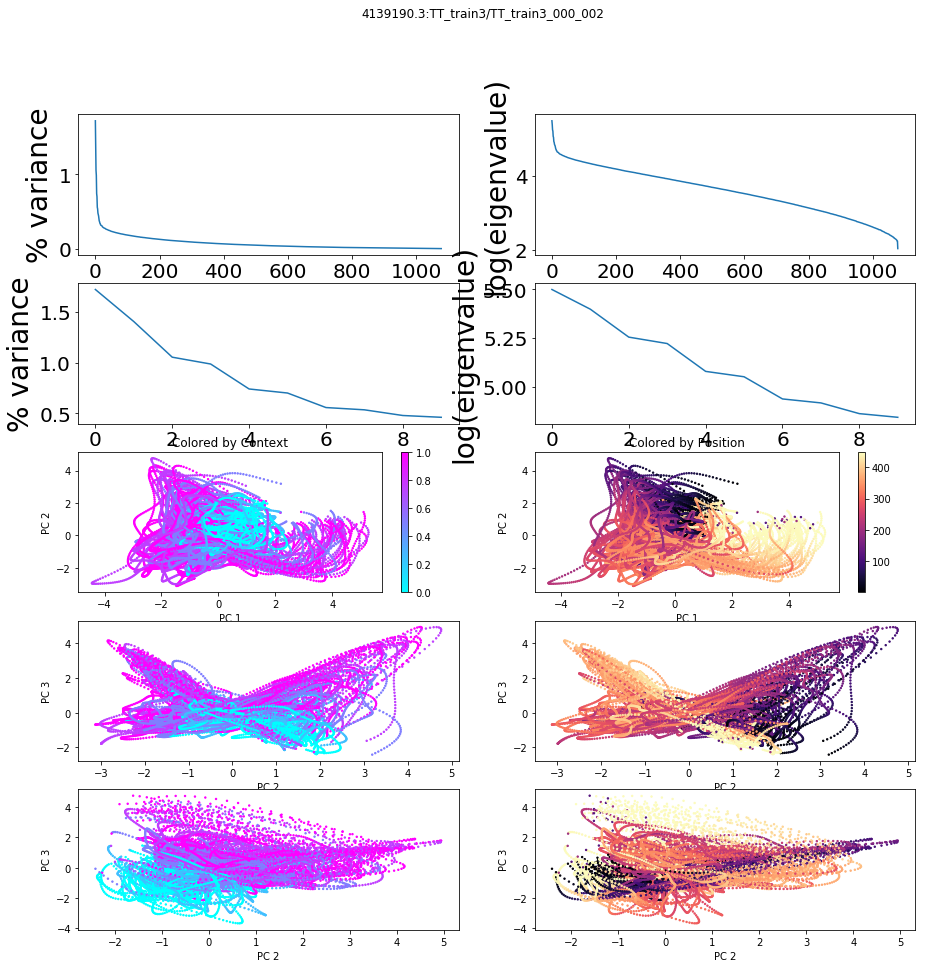

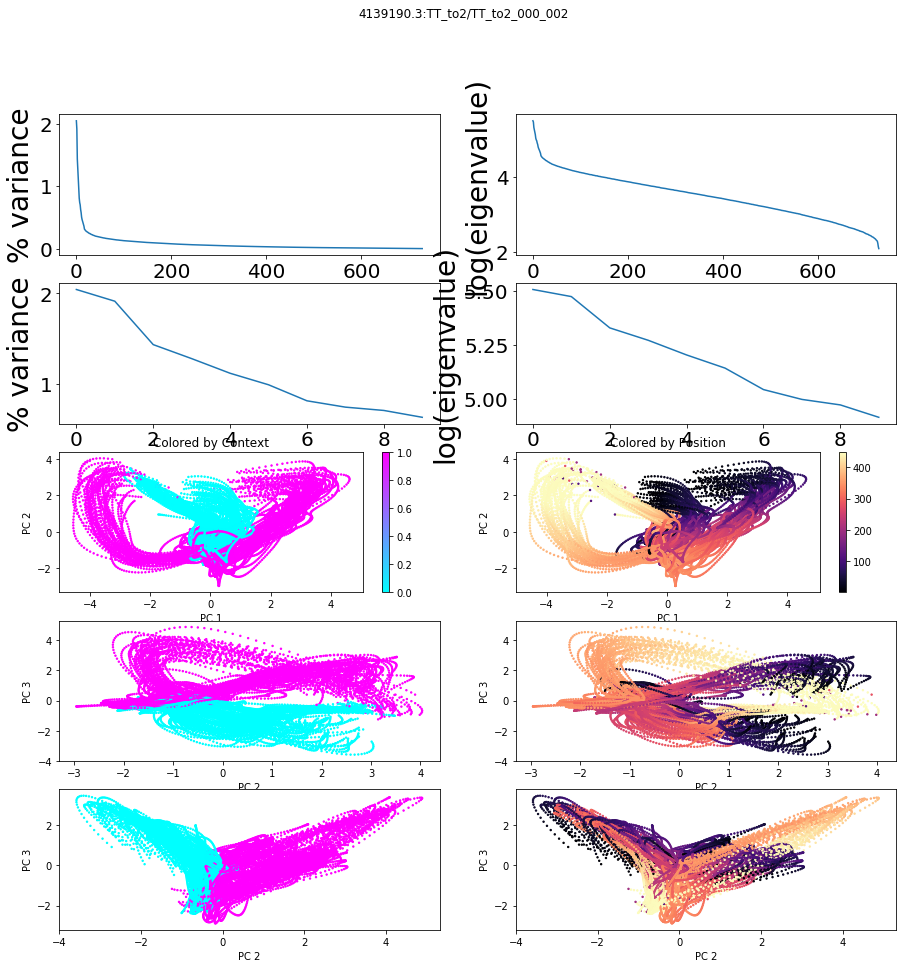

In [102]:
for mouse in dataDict.keys():
    for scan in C_dat[mouse].keys():
        pca = PCA()
        C_dec = gaussian_filter1d(sp.stats.zscore(C_dat[mouse][scan]['S_dec'],axis=0),10,axis=0)
        C_pca = pca.fit_transform(C_dec)
        behavior = C_dat[mouse][scan]['behavior']
        # skree plots
        f,axarr = plt.subplots(5,2,figsize=[15,15])
        f.suptitle(mouse + ":" + scan,size='large')
        axarr[0,0].plot(pca.explained_variance_)
        axarr[0,0].set_ylabel("% variance",size=28)
        axarr[0,0].tick_params(labelsize=20)

        axarr[0,1].plot(np.log(pca.singular_values_))
        axarr[0,1].set_ylabel("log(eigenvalue)",size=28)
        axarr[0,1].tick_params(labelsize=20)

        axarr[1,0].plot(pca.explained_variance_[:10])
        axarr[1,0].set_ylabel("% variance",size=28)
        axarr[1,0].tick_params(labelsize=20)


        axarr[1,1].plot(np.log(pca.singular_values_[:10]))
        axarr[1,1].set_ylabel("log(eigenvalue)",size=28)
        axarr[1,1].tick_params(labelsize=20)


        trialMask = (behavior['position']>0)  
        #context_trialMask = (Behavior[i]['position'].values>0) & (Behavior[i]['morph'].values!=0) &(Behavior[i]['morph'].values!=1)



        s_cxt=axarr[2,0].scatter(C_pca[trialMask,0],C_pca[trialMask,1],c=behavior['morph'][trialMask],cmap='cool',s=2)
        plt.colorbar(s_cxt,ax=axarr[2,0])
        axarr[2,0].set_title('Colored by Context')
        axarr[2,0].set_xlabel("PC 1")
        axarr[2,0].set_ylabel("PC 2")

        s_pos=axarr[2,1].scatter(C_pca[trialMask,0],C_pca[trialMask,1],c=behavior['position'][trialMask],cmap='magma',s=2)
        plt.colorbar(s_pos,ax=axarr[2,1])
        axarr[2,1].set_title('Colored by Position')
        axarr[2,1].set_xlabel("PC 1")
        axarr[2,1].set_ylabel("PC 2")

        s_cxt=axarr[3,0].scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=behavior['morph'][trialMask],cmap='cool',s=2)
        axarr[3,0].set_xlabel("PC 2")
        axarr[3,0].set_ylabel("PC 3")

        s_cxt=axarr[3,1].scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=behavior['position'][trialMask],cmap='magma',s=2)
        axarr[3,1].set_xlabel("PC 2")
        axarr[3,1].set_ylabel("PC 3")

        s_cxt=axarr[4,0].scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=behavior['morph'][trialMask],cmap='cool',s=2)
        axarr[4,0].set_xlabel("PC 2")
        axarr[4,0].set_ylabel("PC 3")

        s_cxt=axarr[4,1].scatter(C_pca[trialMask,2],C_pca[trialMask,3],c=behavior['position'][trialMask],cmap='magma',s=2)
        axarr[4,1].set_xlabel("PC 2")
        axarr[4,1].set_ylabel("PC 3")

(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(5, 100, 1)
(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(2, 100, 1)
(5, 100, 1)
(2, 100, 1)


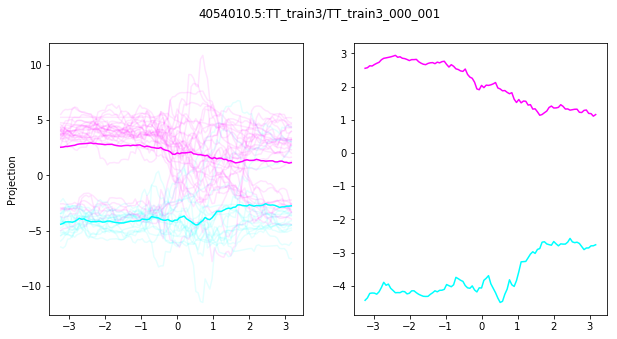

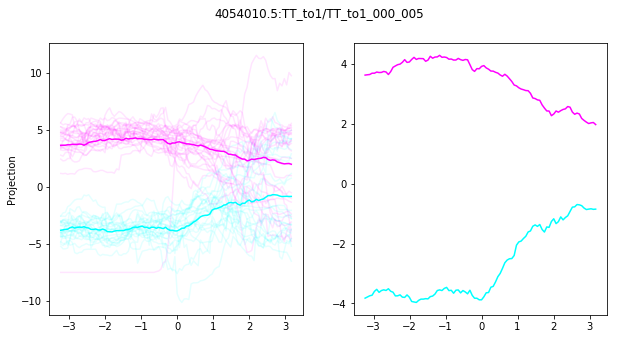

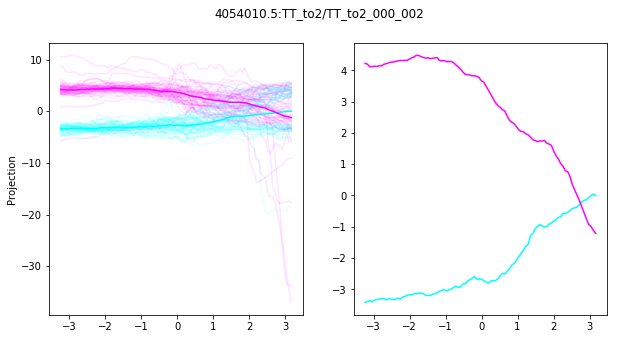

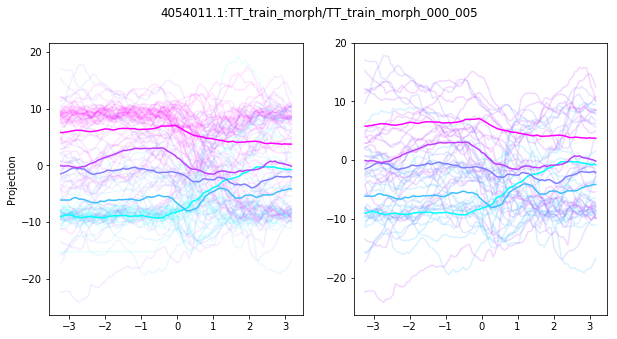

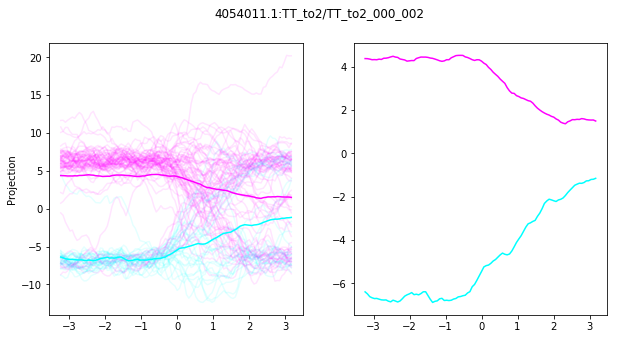

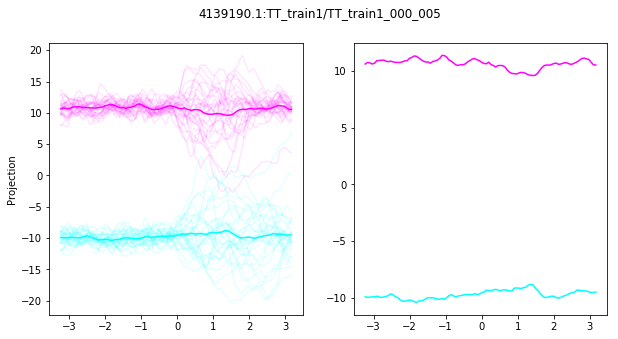

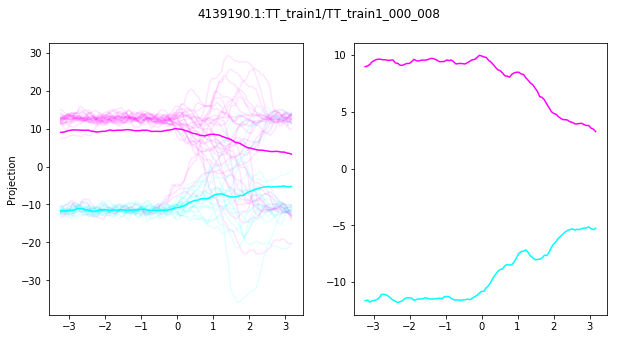

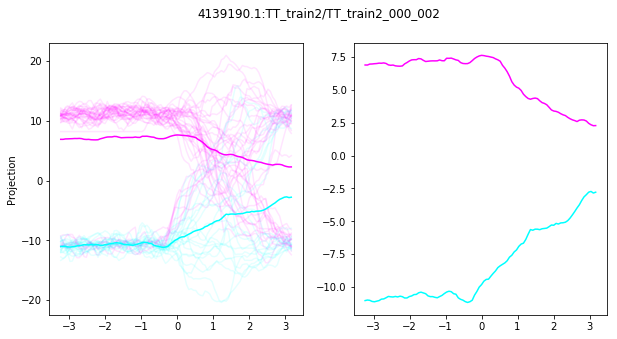

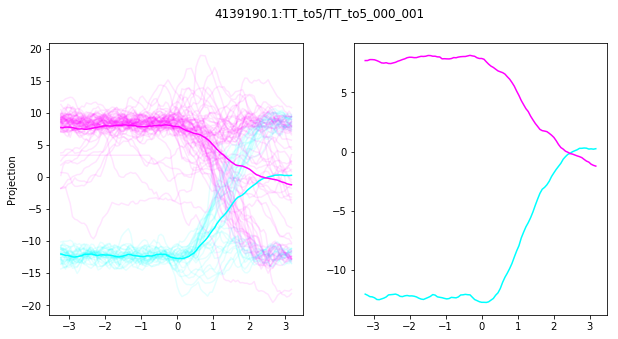

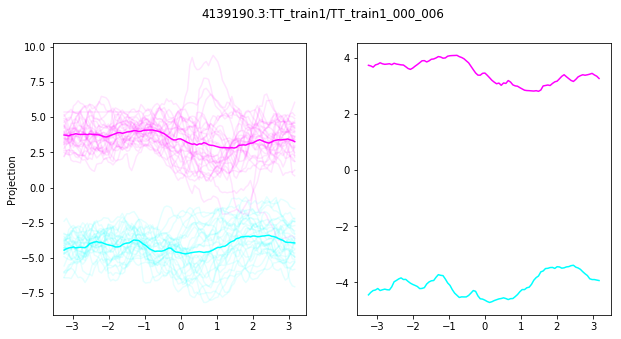

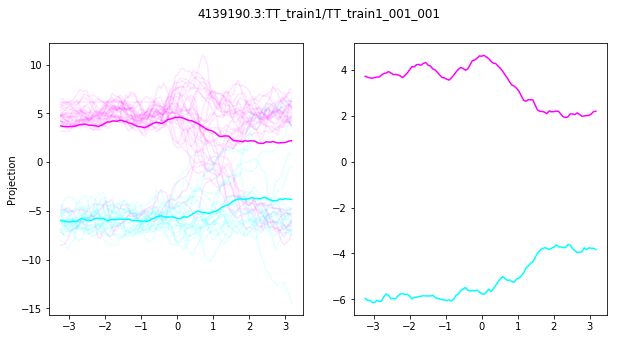

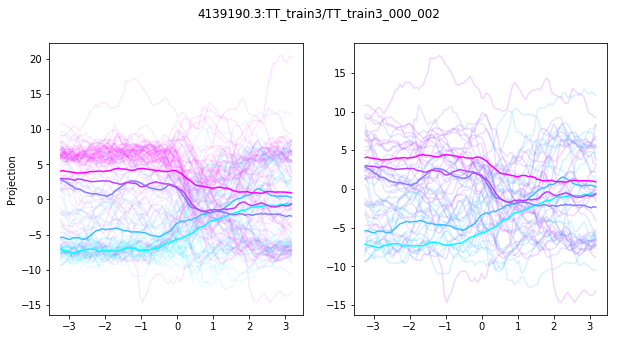

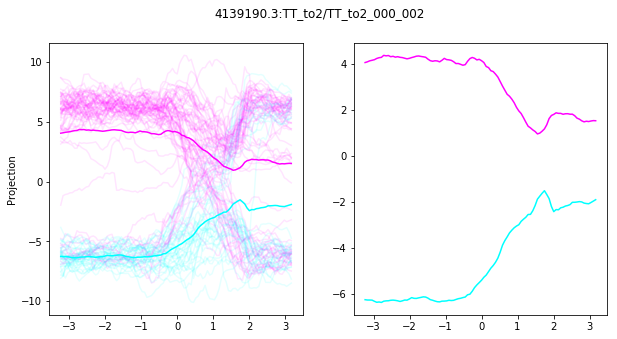

In [99]:
for mouse in dataDict.keys():
    for scan in C_dat[mouse].keys():
        pca = PCA()
        C_dec = sp.stats.zscore(C_dat[mouse][scan]['C_dec'],axis=0)
        C_pca = pca.fit_transform(C_dec)
        behavior = C_dat[mouse][scan]['behavior']


        #C_dec = sp.stats.zscore(ca_dat['C_dec'][behavior['ca_inds'].values,:],axis=0)
        base_trial_mask = np.where(((behavior['morph']==1) | (behavior['morph']==0)) & 
                                  (behavior['error mask']==0) & (behavior['position']>0))[0]
        tstart_inds = behavior['tstart inds']
        lda = LDA(n_components=1)
        C_base_lda = lda.fit_transform(C_dec[base_trial_mask,:],behavior['morph'][base_trial_mask])
        C_lda = lda.transform(C_dec)

        f,ax = plt.subplots(1,2,figsize=[10,5])
        f.suptitle(mouse+":"+scan,size='large')
        #LDAs.append(lda)

        trialMat_proj, morphVec = trial_tensor(C_lda,behavior['morph'],np.array(tstart_inds))

        morphAvg_proj, morphVals = across_trial_avg(trialMat_proj,morphVec)


        ax[0].set_ylabel("Projection")
        for ind,t in enumerate(tstart_inds):
            ax[0].plot(np.arange(-50,50)/15.46,trialMat_proj[ind,:,:],c=plt.cm.cool(morphVec[ind]),alpha=.1)


            if (morphVec[ind]!=1.0) and (morphVec[ind]!=0.0):
                ax[1].plot(np.arange(-50,50)/15.46,trialMat_proj[ind,:,:],c=plt.cm.cool(behavior['morph'][t]),alpha=.2)


        print(morphAvg_proj.shape)
        for i,val in enumerate(morphVals.tolist()):
            ax[0].plot(np.arange(-50,50)/15.46,np.squeeze(morphAvg_proj[i,:]),c=plt.cm.cool(val))
            ax[1].plot(np.arange(-50,50)/15.46,np.squeeze(morphAvg_proj[i,:]),c=plt.cm.cool(val))


(6157,)
(6157, 242) (6157,)


../..\utilities.py:33: RuntimeWarning: invalid value encountered in true_divide
  p_map = gaussian_filter(frmap[:,i],2)/frmap[:,i].sum()
../..\utilities.py:75: RuntimeWarning: invalid value encountered in greater
  p[cell] = np.where(SI[cell]>shuffled_SI[:,cell])[0].shape[0]/nperms


(6104,)
(6104, 242) (6104,)
(7002,)
(7002, 278) (7002,)
(5770,)
(5770, 278) (5770,)
(13023,)
(13023, 370) (13023,)


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


(10943,)
(10943, 370) (10943,)
(8992,)
(8992, 1149) (8992,)
(8630,)
(8630, 1149) (8630,)
(12571,)
(12571, 1235) (12571,)
(17300,)
(17300, 1235) (17300,)
(10478,)
(10478, 1319) (10478,)
(9304,)
(9304, 1319) (9304,)
(8026,)
(8026, 1237) (8026,)
(7268,)
(7268, 1237) (7268,)
(11582,)
(11582, 1522) (11582,)
(10929,)
(10929, 1522) (10929,)
(8319,)
(8319, 1431) (8319,)
(17298,)
(17298, 1431) (17298,)
(11140,)
(11140, 679) (11140,)
(11586,)
(11586, 679) (11586,)
(7564,)
(7564, 614) (7564,)
(7632,)
(7632, 614) (7632,)
(9994,)
(9994, 1079) (9994,)
(10907,)
(10907, 1079) (10907,)
(13443,)
(13443, 729) (13443,)
(16258,)
(16258, 729) (16258,)


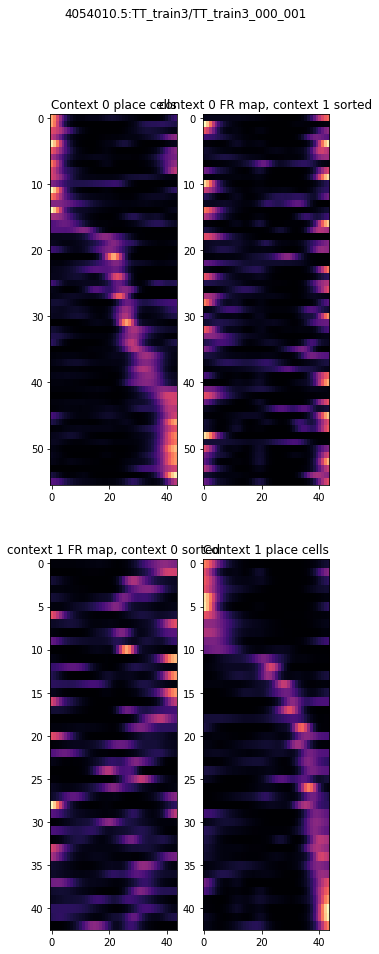

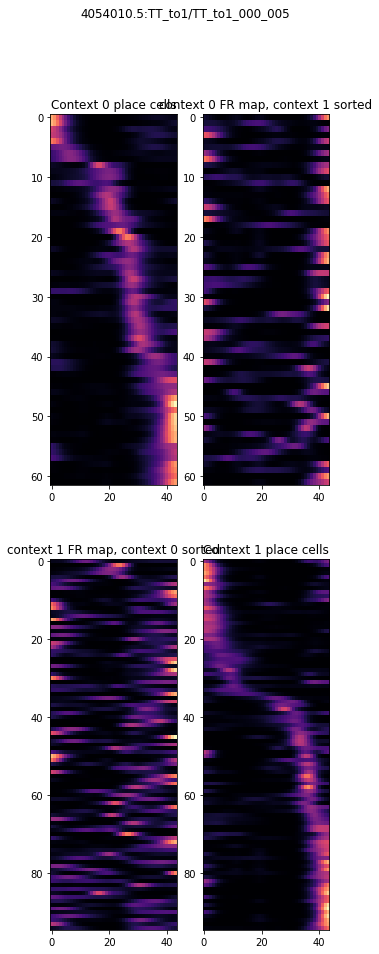

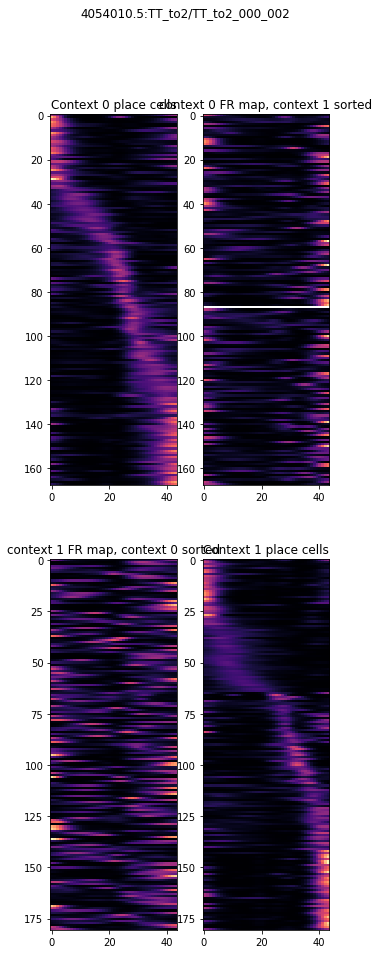

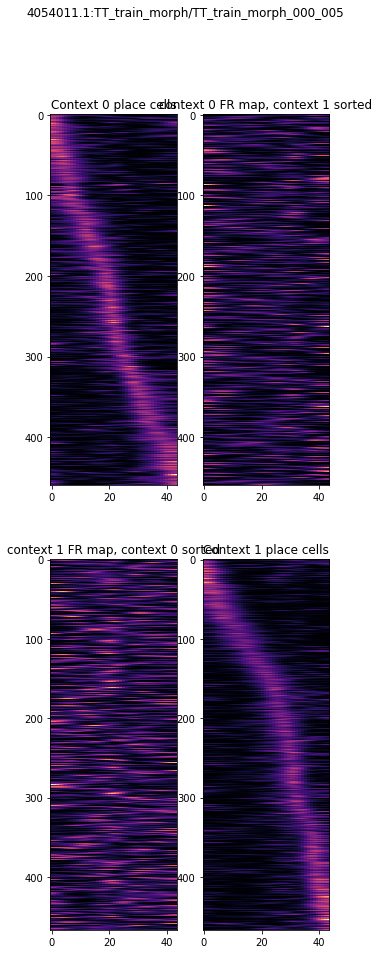

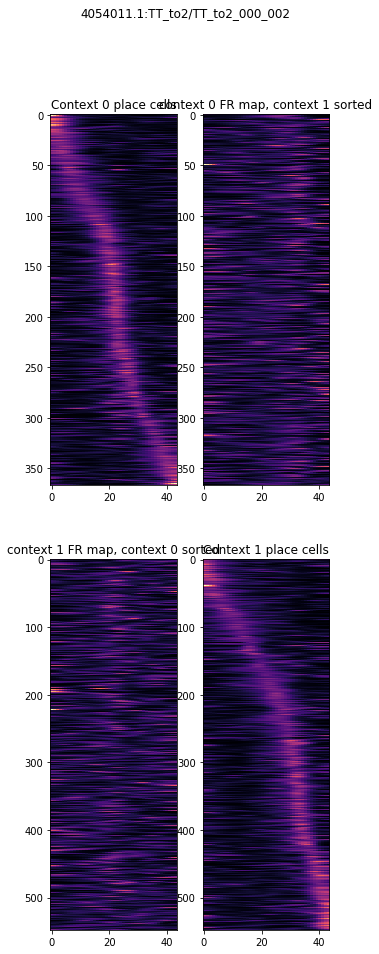

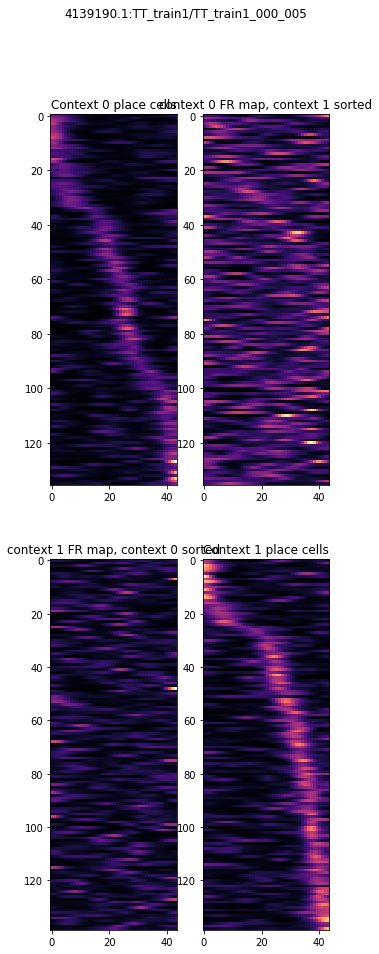

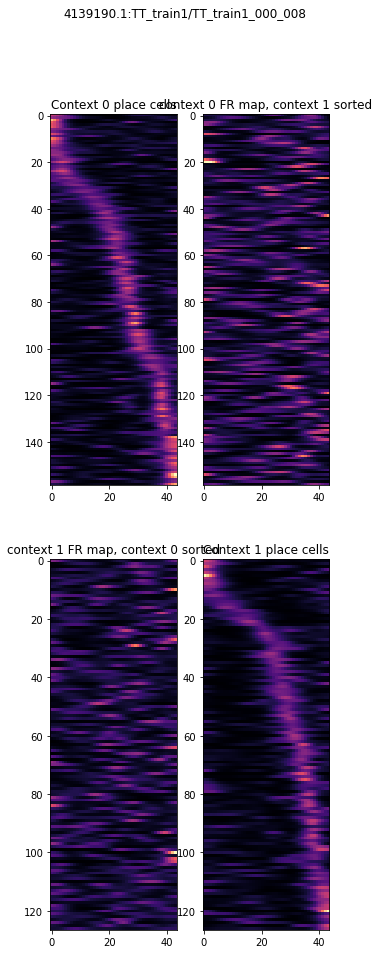

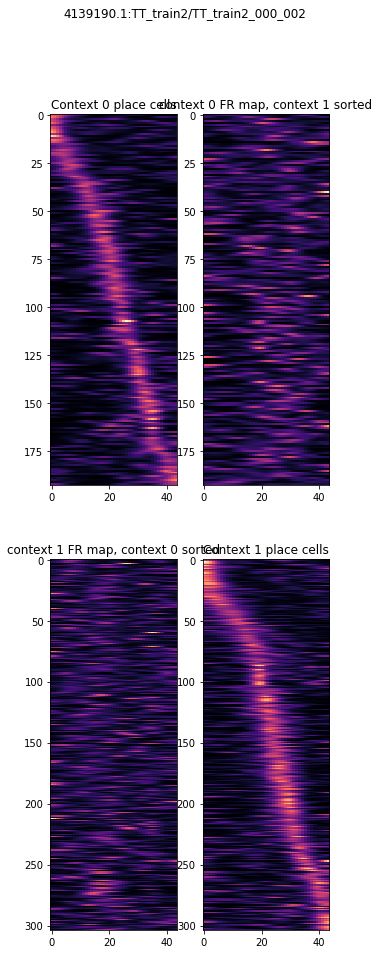

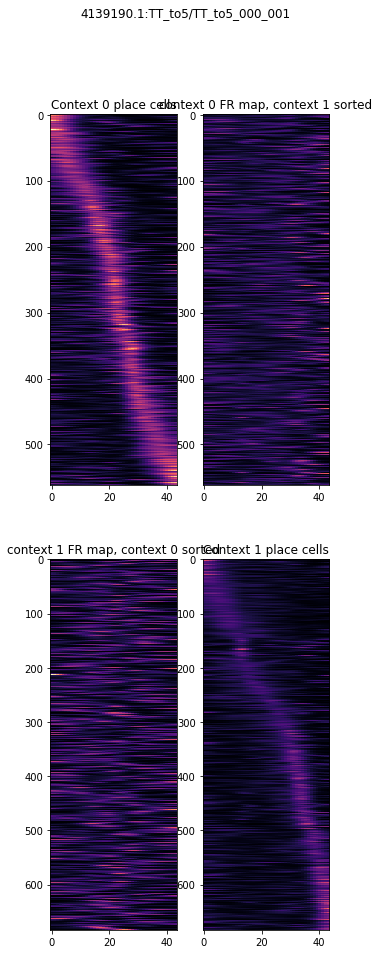

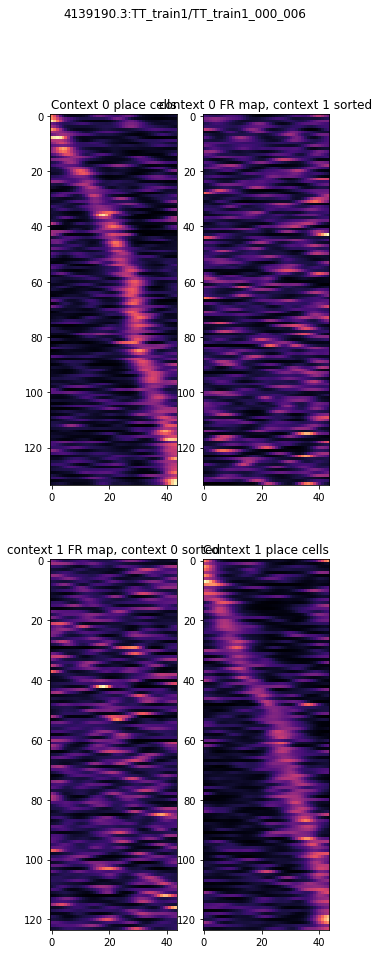

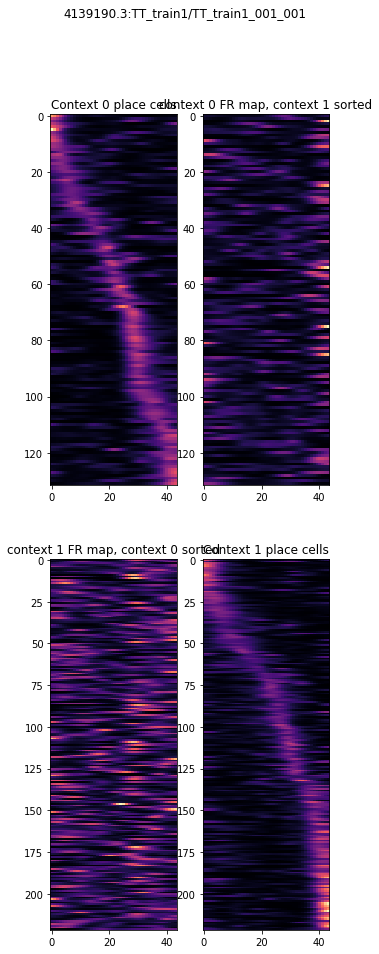

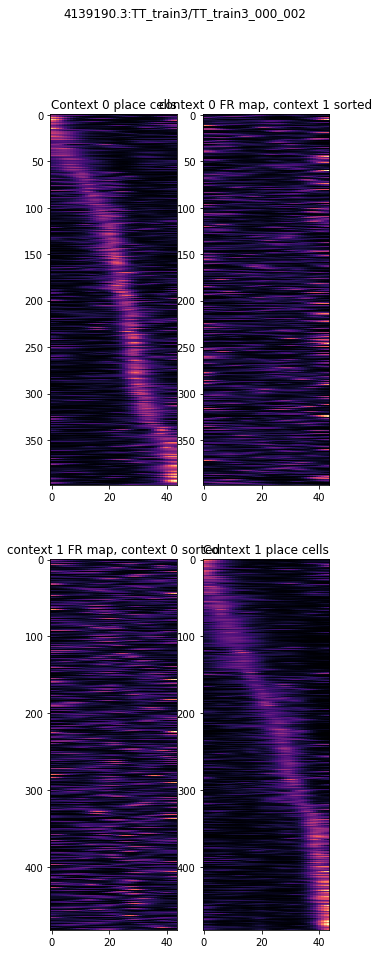

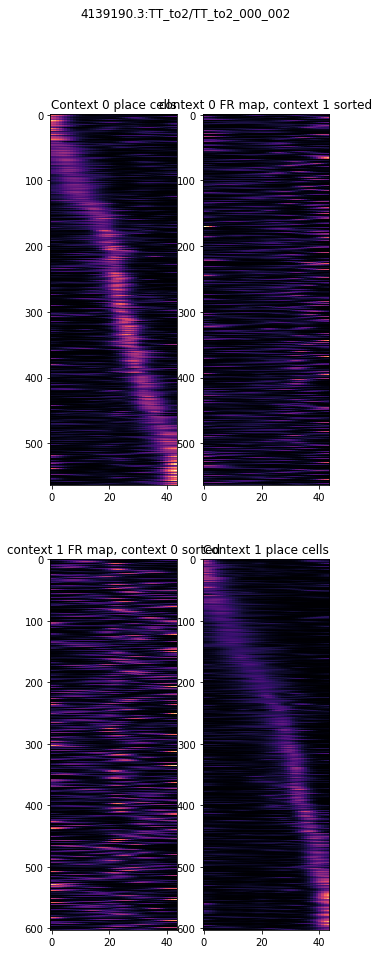

In [109]:
for mouse in dataDict.keys():
    for scan in C_dat[mouse].keys():
        pca = PCA()
        C = gaussian_filter1d(C_dat[mouse][scan]['S_dec'],10,axis=0)
        #C = C_dat[mouse][scan]['S_dec']
        behavior = C_dat[mouse][scan]['behavior']

        
        f,ax = plt.subplots(2,2,figsize=[5,15])
        f.suptitle(mouse+":"+scan,size='large')
        for val in [0, 1]:
            mask = behavior['morph']==val
            print(np.where(mask)[0].shape)
            print(C[mask,:].shape,behavior['position'][mask].shape)
            frmap, occupancy = utilities.rate_map(C[mask,:],behavior['position'][mask])
            si = utilities.spatial_info(frmap,occupancy)
            p = utilities.spatial_info_perm_test(si,C[mask,:],behavior['position'][mask],nperms = 100)

         
            frmap_sig = frmap[:,p>.95]
            maxInds = np.argmax(frmap_sig,axis=0)
            normMat = np.zeros(frmap_sig.shape)
            for j in range(frmap_sig.shape[1]):
                normMat[:,j] = gaussian_filter(frmap_sig[:,j],2)/frmap_sig[:,j].sum()
            sortVec = np.argsort(maxInds)
            ax[val,val].imshow(normMat[:,sortVec].T,aspect='auto',cmap='magma')
            ax[val,val].set_title("Context %i place cells" % val)

            mask_other = behavior['morph'] == np.abs(val-1)
            frmap_other,occ_other = utilities.rate_map(C[mask_other,:],behavior['position'][mask_other])
            frmap_other_sig = frmap_other[:,p>.95]


            normMat_other = np.zeros(frmap_other_sig.shape)
            for j in range(frmap_other_sig.shape[1]):
                normMat_other[:,j] = gaussian_filter(frmap_other_sig[:,j],2)/frmap_other_sig[:,j].sum()

            normMat_other_sort = normMat_other[:,sortVec]
            ax[val,int(np.abs(val-1))].imshow(normMat_other_sort[:,sortVec].T,aspect='auto',cmap='magma')
            ax[val,int(np.abs(val-1))].set_title("context %i FR map, context %i sorted" % (val, int(np.abs(val-1))))

            # add plot below rate maps showing where density of new place fields are


(61,) (61,)
(100,) (100,)


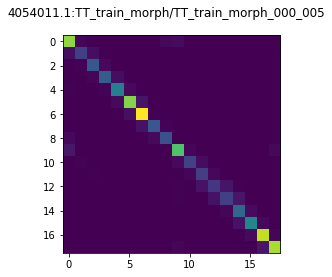

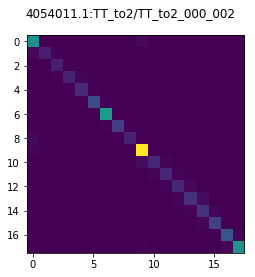

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
for mouse in ['4054011.1']: #dataDict.keys():
    for scan in C_dat[mouse].keys():
        
        behavior = C_dat[mouse][scan]['behavior']
        C_dec = sp.stats.zscore(C_dat[mouse][scan]['C_dec'],axis=0)[(behavior['morph']==0) | (behavior['morph']==1)]
        
        
        pos = behavior['position'][(behavior['morph']==0) | (behavior['morph']==1)]
        context = behavior['morph'][(behavior['morph']==0) | (behavior['morph']==1)]
        tstart = behavior['tstart'][(behavior['morph']==0) | (behavior['morph']==1)]
        teleport = behavior['teleports'][(behavior['morph']==0) | (behavior['morph']==1)]
        
        tstart_inds, teleport_inds = np.where(tstart==1)[0], np.where(teleport==1)[0]
        print(tstart_inds.shape,teleport_inds.shape)
        
        pos_binned = np.zeros(pos.shape)
        bin_edges = np.arange(0,450,50).tolist()
        bin_centers = [(bin_edges[k]+bin_edges[k+1])/2 for k in range(len(bin_edges)-1)]
        for j,(edge1,edge2) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
            pos_binned[(pos>edge1) & (pos<=edge2)] = j+1

        labels = pos_binned+ context*len(bin_edges)
        
        
        order = np.random.permutation(tstart_inds.shape)
        tstart_inds, teleport_inds = tstart_inds[order], teleport_inds[order]
        mid_point = int(order.shape*.5)
        trialList = []
        for start, stop in zip((tstart_inds,teleport_inds)):
            trialList.append(np.arange(start,stop).tolist())
        trainInds = np.array(trialList[:mid_point]).ravel()
        testInds = np.array(trialList[mid_point:]).ravel()
        
        
        LR = LogisticRegression(penalty = 'l2', solver = 'newton-cg',multi_class='multinomial',C=.001)
        LR.fit(C_dec[train_inds,:],labels[train_inds])
        
        #print(mouse+":" + scan+ "mean accuracy %f" % LR.score(C_dec[test_inds,:], labels[test_inds]))

        cm = confusion_matrix(labels[test_inds],LR.predict(C_dec[test_inds,:]))
        f,ax = plt.subplots()
        f.suptitle(mouse+":" + scan)
        ax.imshow(cm)